In [1]:
import tensorflow as tf

In [2]:
#from tensorflow.examples.tutorials.mnist import input_data

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#mnist = input_data.read_data_sets("/tmp/data/", one_hot= True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


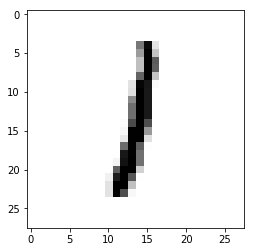

In [5]:
#plt.imshow(mnist.train.images[4].reshape(28, 28), cmap = "Greys")

In [6]:
# This will reset the computation graph, if some variables are disallowed, run this once
tf.reset_default_graph()

In [7]:
def generator(z, reuse= None):
    # works like a module | see difference between scope and function
    # "reuse" allows to retain the values of variables inside scope on another call
    with tf.variable_scope("gen", reuse= reuse):
        # Leak factor
        alpha = 0.01

        # "units" is the number of nodes in the layer
        hidden1 = tf.layers.dense(inputs = z, units = 128)
        # leaky relu like
        hidden1 = tf.maximum(hidden1, alpha*hidden1)

        hidden2 = tf.layers.dense(inputs = hidden1, units = 128)
        hidden2 = tf.maximum(hidden2, alpha*hidden2)

        # "units" is 784 because (28*28) image. And generator generates an image
        output = tf.layers.dense(inputs = hidden2, units = 784, activation = tf.nn.tanh)

        return output


In [8]:

def discriminator(X, reuse=None):
    #print(real_images.get_shape().as_list())
    with tf.variable_scope("dis", reuse= reuse):
        alpha = 0.01

        hidden1 = tf.layers.dense(inputs= X, units= 128)
        hidden1 = tf.maximum(hidden1, hidden1*alpha)

        hidden2 = tf.layers.dense(inputs= hidden1, units= 128)
        hidden2 = tf.maximum(hidden2, hidden2*alpha)

        logits = tf.layers.dense(inputs= hidden2, units= 1)
        output = tf.sigmoid(logits)

        return output, logits


In [9]:
src_speaker = tf.placeholder(tf.float32, shape= [None, 784])
#z = tf.placeholder(tf.float32, shape= [None, 100])

In [10]:
#G = generator(z)
G = generator(src_speaker)

In [11]:
D_output_real, D_logits_real = discriminator(real_images)

In [12]:
D_output_fake, D_logits_fake = discriminator(G, reuse= True)

In [13]:
def loss_func(logits_in, labels_in):
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits= logits_in, labels= labels_in))
    return cost

In [14]:
D_loss_real = loss_func(D_logits_real, tf.ones_like(D_logits_real))
D_loss_fake = loss_func(D_logits_fake, tf.zeros_like(D_logits_real))

In [15]:
D_loss = D_loss_real + D_loss_fake

In [16]:
G_loss = loss_func(D_logits_fake, tf.ones_like(D_logits_fake))

In [17]:
tvars = tf.trainable_variables()

d_vars = []
g_vars = []

for i in range(len(tvars)):
    if tvars[i].name[:3] == "gen":
        g_vars.append(tvars[i])
    else:
        d_vars.append(tvars[i])

In [18]:
learning_rate = 0.001

In [19]:
D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss, var_list = d_vars)

In [20]:
G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss, var_list = g_vars)

In [21]:
epochs = 10
batch_size = 100

In [22]:
init = tf.global_variables_initializer()

In [23]:
samples = []

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(epochs):
        num_batches = int(mnist.train.num_examples/batch_size)

        for i in range(num_batches):
            batch = mnist.train.next_batch(batch_size)
            batch_images = batch[0].reshape((batch_size, 784))
            batch_images = batch_images*2-1

            batch_z = np.random.uniform(-1, 1, size= (batch_size, 100))

            _ = sess.run(D_trainer, feed_dict={real_images:batch_images, z: batch_z})
            _ = sess.run(G_trainer, feed_dict={z: batch_z})

        print("epoch ", epoch , " completed.")
        sample_z = np.random.uniform(-1, 1, size= (1, 100))
        gen_sample = sess.run(generator(z, reuse=True), feed_dict= {z:sample_z})

        samples.append(gen_sample)

epoch  0  completed.
epoch  1  completed.
epoch  2  completed.
epoch  3  completed.
epoch  4  completed.
epoch  5  completed.
epoch  6  completed.
epoch  7  completed.
epoch  8  completed.
epoch  9  completed.


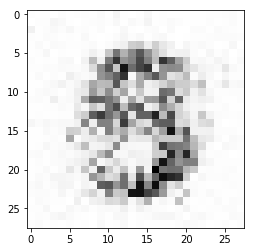

In [24]:
plt.imshow(samples[9].reshape(28,28), cmap="Greys")
plt.show()